# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [208]:
import pandas as pd

In [2]:
# 상반기, 하반기 주유소 가격 데이터 조회
first_df,second_df = [pd.read_csv(f"data/2022년_서울_{title}반기_일별_가격.csv",encoding="cp949") for title in ("상","하")]
display(first_df.head())
display(second_df.head())

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220701,SK에너지,셀프,2487,2287,2297,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220702,SK에너지,셀프,2447,2247,2277,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220703,SK에너지,셀프,2447,2247,2277,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220704,SK에너지,셀프,2447,2247,2277,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220705,SK에너지,셀프,2447,2247,2277,0


In [3]:
# 상반기, 하반기 DataFrame 합치기
total_df = pd.concat([first_df,second_df])
print(total_df.shape)

(164482, 11)


In [4]:
# DataFrame 기본 정보 조회
print(total_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 164482 entries, 0 to 81792
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.1+ MB
None


In [5]:
# 상표 컬럼의 고유값 조회
print(total_df["상표"].unique())

['SK에너지' 'GS칼텍스' '현대오일뱅크' 'S-OIL' '알뜰주유소' '자가상표' '알뜰(ex)']


In [6]:
# 지역 컬럼의 고유값 조회
print(total_df["지역"].unique())

['서울 강남구' '서울 강동구' '서울 강북구' '서울 강서구' '서울 관악구' '서울 광진구' '서울 구로구' '서울 금천구'
 '서울 노원구' '서울 도봉구' '서울 동대문구' '서울 동작구' '서울 마포구' '서울 서대문구' '서울 서초구' '서울 성동구'
 '서울 성북구' '서울 송파구' '서울 양천구' '서울 영등포구' '서울 용산구' '서울 은평구' '서울 종로구' '서울 중구'
 '서울 중랑구']


> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [7]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)
total_df['구'] = total_df["지역"].str.split(" ").apply(lambda x: x[1])
total_df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구


In [8]:
# 기간 컬럼을 datetime 타입으로 변경
total_df["기간"] = pd.to_datetime(total_df["기간"],format="%Y%m%d")
total_df.head(3)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구


In [9]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
total_df['월'],total_df['일'],total_df['요일'] = [eval(f"total_df['기간'].dt.{date}" ) for date in ("month","day","weekday")]
total_df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [10]:
# 휘발유 가격이 가장 비싼 5개 행 조회
# total_df.iloc[total_df["휘발유"].sort_values(ascending=False)[:5].index,]
total_df.nlargest(5,"휘발유")

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,2
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,3
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,4
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,5
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,6


In [11]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
total_df[total_df["휘발유"] > 0].nsmallest(5,"휘발유")

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
15149,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,4
15150,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,5
15151,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-25,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,25,6
15152,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-26,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,26,0
15153,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-27,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,27,1


In [12]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
total_df.nlargest(5,"고급휘발유")

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,2
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,3
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,4
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,5
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,6


In [13]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
total_df[total_df["고급휘발유"] > 0].nsmallest(5,"고급휘발유")

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
15881,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-19,S-OIL,셀프,1599,1527,1787,0,강서구,12,19,0
15882,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,1
15883,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,2
15884,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,3
15885,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,4


In [14]:
# 경유 가격이 가장 비싼 5개 행 조회
total_df.nlargest(5,"경유")

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,1
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,6,29,2
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,3
77929,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,7,1,4
77930,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-02,SK에너지,일반,3481,3081,3230,2703,중구,7,2,5


In [15]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
total_df[total_df["경유"] > 0 ].nsmallest(5,"경유")

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,1,16,6
12337,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-05,알뜰주유소,일반,0,1547,1377,1397,강서구,1,5,2
12338,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-06,알뜰주유소,일반,0,1547,1377,1397,강서구,1,6,3
12339,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-07,알뜰주유소,일반,0,1547,1377,1397,강서구,1,7,4
12340,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-08,알뜰주유소,일반,0,1547,1377,1397,강서구,1,8,5


In [16]:
import numpy as np

In [65]:
# 상표별 휘발유 평균가격 조회
brand_df = np.round(total_df.groupby("상표")["휘발유"].mean(),2).to_frame()
display(brand_df)

,휘발유
상표,
GS칼텍스,1904.90
S-OIL,1859.28
SK에너지,1908.90
알뜰(ex),1759.88
알뜰주유소,1767.91
자가상표,1823.62
현대오일뱅크,1839.45


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='상표'>

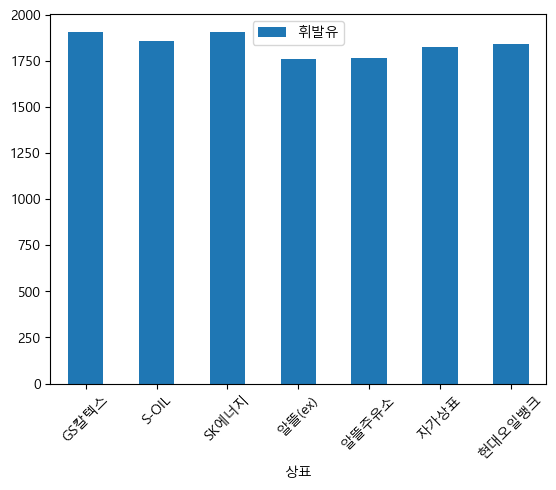

In [27]:
# 상표별 휘발유 평균가격 시각화
brand_df.plot(kind="bar",rot=45)

In [28]:
total_df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [30]:
# 셀프주유소와 일반주유소 개수 확인
display(total_df["셀프여부"].value_counts())

셀프여부
셀프    92478
일반    72004
Name: count, dtype: int64

In [64]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
np.round(total_df.groupby("셀프여부")["휘발유"].mean(),2).to_frame()

,휘발유
셀프여부,
셀프,1818.22
일반,1953.87


In [45]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
self_df = np.round(total_df.pivot_table(index="상표",columns="셀프여부",values="휘발유",aggfunc="mean"),2)
display(self_df)

셀프여부,셀프,일반
상표,,
GS칼텍스,1825.85,2001.42
S-OIL,1820.12,1932.12
SK에너지,1826.72,2003.23
알뜰(ex),1759.88,NaN
알뜰주유소,1754.26,1796.20
자가상표,2017.00,1821.77
현대오일뱅크,1807.27,1877.61


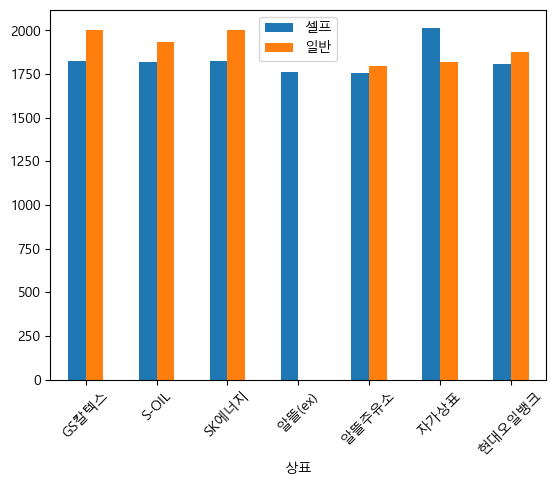

In [58]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화
self_df.plot(kind="bar",rot=45).legend(loc="upper center")

In [66]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
var_df = total_df.groupby('상표')['휘발유'].var().to_frame()
display(var_df)

,휘발유
상표,
GS칼텍스,69242.514658
S-OIL,44065.884881
SK에너지,64340.179469
알뜰(ex),34754.964745
알뜰주유소,38992.003703
자가상표,59506.227088
현대오일뱅크,51256.812178


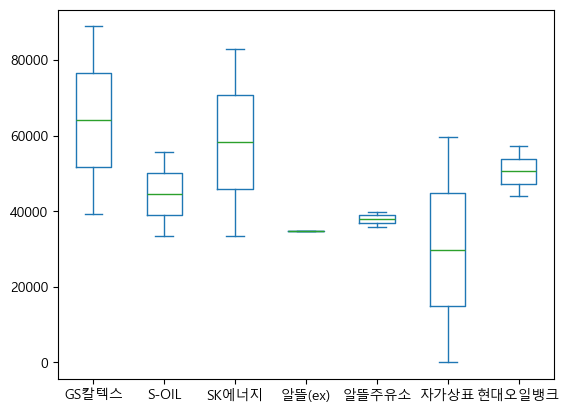

In [79]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화
var2_df = np.round(total_df.pivot_table(index="셀프여부",columns="상표",values="휘발유",aggfunc="var"),2).plot(kind="box")

In [86]:
# 구별 휘발유 가격의 평균
np.round(total_df.groupby("구")["휘발유"].mean().to_frame(),2)

,휘발유
구,
강남구,2024.21
강동구,1910.69
강북구,1787.32
강서구,1829.30
관악구,1851.05
광진구,1818.29
구로구,1864.68
금천구,1799.26
노원구,1845.41


In [121]:
# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격
max_gu = total_df.groupby("구")['휘발유'].mean().sort_values(ascending=False).index[0]
total_df[total_df["구"]==max_gu].groupby("상표")["휘발유"].mean().to_frame()

,휘발유
상표,
GS칼텍스,2386.086653
SK에너지,2245.048402
현대오일뱅크,2013.058905


In [125]:
# 월 평균 휘발유 가격
np.round(total_df.groupby("월")["휘발유"].mean().to_frame(),2).T

월,1,2,3,4,5,6,7,8,9,10,11,12
휘발유,1704.98,1781.8,2007.94,2030.14,2027.26,2151.49,2082.67,1858.74,1799.55,1737.29,1715.45,1627.07


In [133]:
# 각 구의 월별 평균 휘발유 가격 
gu_df = np.round(total_df.pivot_table(index="월",columns="구",values="휘발유",aggfunc="mean"),2)
display(gu_df)

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1,1845.04,1732.29,1599.38,1657.35,1693.37,1643.83,1679.96,1643.85,1671.23,1613.96,...,1734.80,1632.61,1678.79,1633.02,1700.58,2046.39,1641.13,1924.91,2002.51,1624.84
2,1914.71,1797.40,1692.99,1744.52,1767.61,1733.17,1754.28,1718.96,1749.08,1702.60,...,1810.23,1715.84,1741.30,1711.94,1777.38,2119.34,1714.38,1995.06,2073.92,1714.38
3,2109.48,2020.05,1954.91,1968.37,1992.62,1965.27,2005.56,1947.87,1981.65,1964.16,...,2042.38,1961.17,1967.73,1943.26,2006.05,2266.33,1956.02,2193.61,2235.39,1948.59
4,2138.08,2075.56,1968.94,1994.08,2012.60,1975.05,2035.07,1948.89,2007.24,1974.97,...,2078.88,1978.13,2001.12,1962.07,2035.38,2267.59,1984.84,2230.10,2182.42,1977.86
5,2137.11,2055.98,1946.04,1989.01,1986.18,1959.89,2015.15,1941.69,2007.70,1958.48,...,2060.63,1957.71,1991.34,1954.15,2027.46,2387.13,1966.93,2252.17,2325.95,1954.36
6,2273.51,2174.08,2077.16,2118.27,2117.29,2096.48,2132.77,2081.94,2117.35,2086.65,...,2190.38,2088.65,2115.77,2084.83,2143.57,2471.29,2087.96,2350.65,2434.63,2076.31
7,2223.27,2125.90,1976.94,2037.92,2061.85,2018.15,2078.69,1998.35,2070.65,2002.05,...,2139.18,2012.29,2056.82,2004.27,2056.82,2381.95,2028.06,2327.39,2331.20,2022.89
8,2013.87,1910.25,1756.04,1814.66,1829.48,1785.53,1854.95,1788.94,1829.00,1774.89,...,1915.36,1772.32,1826.30,1773.62,1836.01,2165.80,1804.53,2158.13,2137.11,1773.06
9,1965.88,1829.52,1692.45,1744.27,1778.40,1734.72,1786.94,1731.79,1767.56,1712.80,...,1848.38,1709.31,1758.67,1715.98,1767.26,2130.39,1738.69,2110.46,2100.51,1717.47


<Axes: xlabel='월'>

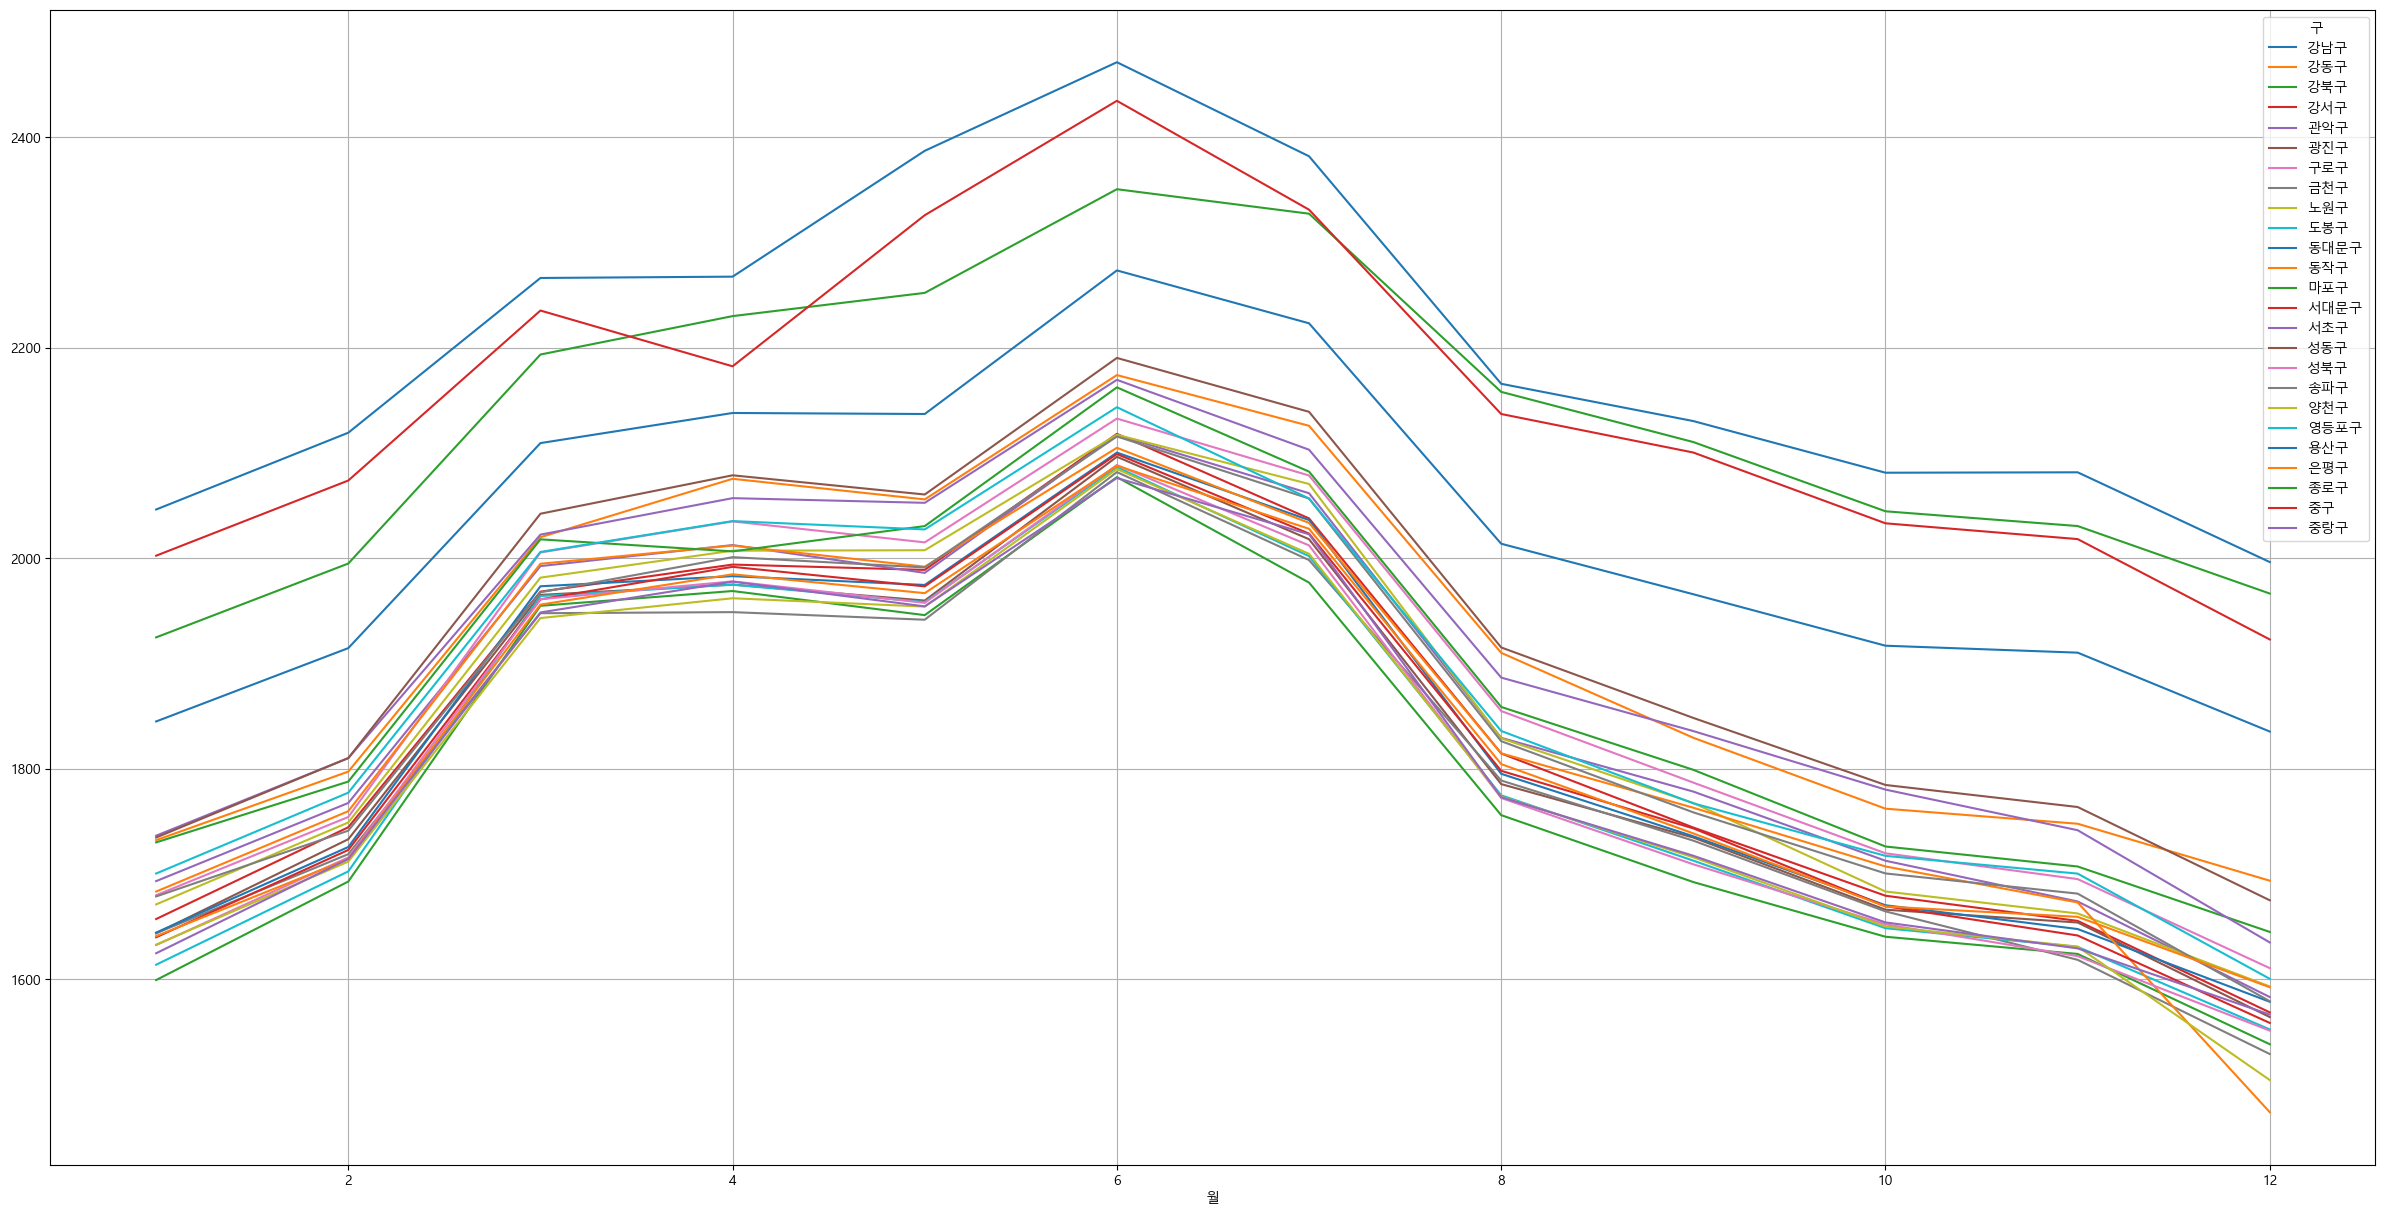

In [152]:
# 각 구의 월별 평균가격의 변화추이 시각화
gu_df.plot(kind="line",figsize=(30,15),grid=True)

In [169]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
display(total_df.groupby("상호")[["휘발유"]].max().sort_values("휘발유",ascending=False)[:5])

,휘발유
상호,
서남주유소,3096
서계주유소,3050
필동주유소,2789
동자동주유소,2690
한석주유소,2681


In [168]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
display(total_df.groupby("상호")[["휘발유"]].max().sort_values("휘발유")[:5])

,휘발유
상호,
(주)동원석유,1654
송파알찬주유소,1690
(주)명보에너지,1755
정다운셀프주유소,1759
오션네트웍스(주) 서울식물원지점,1940


In [191]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)
ex5_oil = set(total_df.groupby("상호")[["휘발유"]].max().sort_values("휘발유",ascending=False)[:5].index)
total_df[total_df["상호"].apply(lambda x: x in ex5_oil)][["상호","주소","상표","셀프여부"]].drop_duplicates()

,상호,주소,상표,셀프여부
72190,동자동주유소,서울 용산구 한강대로104길 6 (동자동),SK에너지,일반
72371,서계주유소,서울 용산구 청파로 367 (청파동),GS칼텍스,일반
73095,한석주유소,서울 용산구 이촌로 164,SK에너지,일반
78766,서남주유소,서울 중구 통일로 30,SK에너지,일반
79846,필동주유소,서울 중구 퇴계로 196 (필동2가),GS칼텍스,일반


In [194]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 주소, 상표, 셀프여부,  조회 - 위에서 조회한 결과에 추가 정보(상표, 셀프여부 등) 조회 (중복제거-drop_duplicates)
ch5_oil = set(total_df.groupby("상호")[["휘발유"]].max().sort_values("휘발유")[:5].index)
total_df[total_df["상호"].apply(lambda x: x in ch5_oil)][["상호","주소","상표","셀프여부"]].drop_duplicates()

,상호,주소,상표,셀프여부
25556,(주)명보에너지,경기도 시흥시 수인로 2186 (목감동),알뜰주유소,일반
32304,정다운셀프주유소,서울 도봉구 도봉로 635,SK에너지,셀프
43575,(주)동원석유,경기도 부천시 원미구 부흥로 182 (중동),S-OIL,셀프
59953,송파알찬주유소,서울 송파구 백제고분로 229 (삼전동),S-OIL,셀프
14459,오션네트웍스(주) 서울식물원지점,서울 강서구 양천로 300,SK에너지,셀프


In [207]:
# 고급 휘발유를 가장 많이 파는 구 조회
total_df[total_df["고급휘발유"] > 0].groupby("구")["고급휘발유"].count().to_frame().sort_values("고급휘발유",ascending=False).index[0]

'강남구'

In [209]:
total_df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [ ]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################

In [223]:
# 1. 휘발유와 고급휘발유 모두 파는 주유소에서, 휘발유 대비 가장 비싸게 고급 휘발유를 파는 주유소와 가장 저렴하게 파는 주유소의 정보 조회하기
df = total_df[(total_df["휘발유"]>0)&(total_df["고급휘발유"]>0)]
df['per']=np.round(df.apply(lambda x:x["고급휘발유"]/x["휘발유"] * 100-100,axis=1),2)
df.sort_values("per",ascending=False).iloc[[0,-1],:]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_9280\394637070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['per']=np.round(df.apply(lambda x:x["고급휘발유"]/x["휘발유"] * 100-100,axis=1),2)


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일,per
55528,A0009511,서울 성북구,현대오일뱅크㈜직영 북악셀프주유소,서울 성북구 정릉로 218 (정릉동),2022-12-27,현대오일뱅크,셀프,2289,1507,1737,0,성북구,12,27,1,51.89
45695,A0000894,서울 서초구,방배동주유소,서울 서초구 효령로 29 (방배동),2022-08-09,SK에너지,일반,1998,1991,2072,0,서초구,8,9,1,0.35
